In [1]:
"""
Imports
"""
import json
import numpy as np
import pandas as pd

import sys
rootPath = '../'
sys.path.insert(0, rootPath+'Architecture/')
from groundTruth import GroundTruth
from statistics import Statistics
from dataManagement import Scaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
Load configuration
"""
dataset = 'BGP_testbed_5'
config = json.loads(open(rootPath+'configuration.json').read())['datasets'][dataset]

In [3]:
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
colors = ['yellow', 'black']
n_bins = [5]  # Discretizes the interpolation into bins
n_bin=40
cmap_name = 'my_list'    
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)

Dataset shape: (1457, 84)
Dataset shape: (1453, 84)
Dataset shape: (380, 84)
Dataset shape: (378, 84)


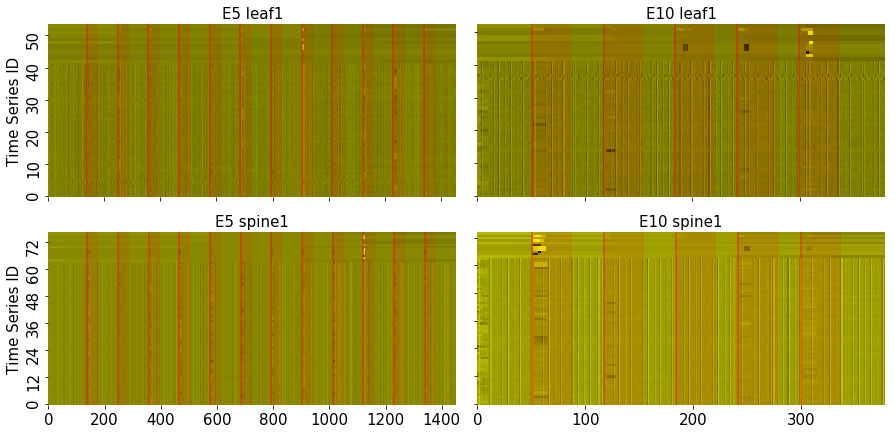

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(dataset, node):
    config = json.loads(open(rootPath+'configuration.json').read())['datasets'][dataset]
    df = pd.read_csv(rootPath + config['directory']+node+config['filename'],
                     low_memory=False, dtype='float64', compression='gzip')\
                    .dropna()
    times = df['time']//1e9
    times = times.astype('int')
    df.drop(['time'], axis=1, inplace=True)    

    scaler = Scaler(scale_type='StandardScaler')
    dfNormalized = scaler.normalize(df)
    print('Dataset shape: {}'.format(dfNormalized.shape))
    
    dfNormalized = dfNormalized.loc[:, (dfNormalized != dfNormalized.iloc[0]).any()]
    
    st = Statistics(dataset, rootPath).gt.df
    dataset_indexes = []
    for start in st['Start']:
        dataset_indexes.append(times[times<start].idxmax())    
    
    
    return dfNormalized.transpose().values, dataset, node, dataset_indexes


datasets = ['BGP_testbed_5', 'BGP_testbed_5']
nodes = ['leaf1', 'spine1']

data = []
for dataset in ['BGP_testbed_5']:
    for node in ['leaf1','spine1']:
        data.append(load_dataset(dataset, node))
        
for dataset in ['BGP_testbed_10']:
    for node in ['leaf1','spine1']:
        data.append(load_dataset(dataset, node))
        
rows = 2
columns = 2

fontsizeticks = 15

fig, ax = plt.subplots(rows, columns, figsize=(15,7))

"""
EX5
"""

color='bone'

yticklabels = 10

title_font_size = 15

sns.heatmap(data[0][0],
            cmap=cm,
            xticklabels=200,
            yticklabels=yticklabels,
            cbar=False,
            ax=ax[0][0])
    
ax[0][0].invert_yaxis()
ax[0][0].set_title('E5 '+data[0][2], fontsize=title_font_size)

sns.heatmap(data[1][0],
            cmap=cm,
            xticklabels=200,
            yticklabels=yticklabels+2,
            cbar=False,
            ax=ax[1][0])
    
ax[1][0].invert_yaxis()
ax[1][0].set_title('E5 '+data[1][2], fontsize=title_font_size)

"""
EX10
"""

sns.heatmap(data[2][0],
            cmap=cm,
            xticklabels=100,
            yticklabels=yticklabels,
            cbar=False,
            ax=ax[0][1])
    
ax[0][1].invert_yaxis()
ax[0][1].set_title('E10 '+data[2][2], fontsize=title_font_size)

sns.heatmap(data[3][0],
            cmap=cm,
            xticklabels=100,
            yticklabels=yticklabels+2,
            cbar=False,
            ax=ax[1][1])
    
ax[1][1].invert_yaxis()
ax[1][1].set_title('E10 '+data[3][2], fontsize=title_font_size)


ax[0][0].tick_params(axis='both', which='major', labelsize=fontsizeticks)
ax[0][0].tick_params(axis='both', which='minor', labelsize=fontsizeticks)

ax[0][0].xaxis.set_ticklabels([])
ax[0][1].xaxis.set_ticklabels([])
ax[0][1].yaxis.set_ticklabels([])
ax[1][1].yaxis.set_ticklabels([])

ax[0][1].tick_params(axis='both', which='major', labelsize=fontsizeticks)
ax[0][1].tick_params(axis='both', which='minor', labelsize=fontsizeticks)

ax[1][0].tick_params(axis='both', which='major', labelsize=fontsizeticks)
ax[1][0].tick_params(axis='both', which='minor', labelsize=fontsizeticks)
    
ax[1][1].tick_params(axis='both', which='major', labelsize=fontsizeticks)
ax[1][1].tick_params(axis='both', which='minor', labelsize=fontsizeticks)    
    
ax[0][0].set_ylabel('Time Series ID', fontsize=fontsizeticks)    
ax[1][0].set_ylabel('Time Series ID', fontsize=fontsizeticks)


event_end = 36

for index in data[0][3]:
    ax[1][0].axvline(x=index, c='r', alpha=0.5)
    ax[1][0].axvspan(index, index+event_end, color='r', alpha=0.1)
    
    ax[0][0].axvline(x=index, c='r', alpha=0.5)
    ax[0][0].axvspan(index, index+event_end, color='r', alpha=0.1) 
    
for index in data[2][3]:
    ax[1][1].axvline(x=index, c='r', alpha=0.5)
    ax[1][1].axvspan(index, index+event_end, color='r', alpha=0.1)
    
    ax[0][1].axvline(x=index, c='r', alpha=0.5)
    ax[0][1].axvspan(index, index+event_end, color='r', alpha=0.1)     
    
        
fig.subplots_adjust(wspace=0.05, hspace=0.2)
plt.savefig('timeseries_heatmap.png', bbox_inches='tight', pad_inches=0, dpi=300)    